## Notebook for analysing newspaper articles using NLTK, WORDCLOUD.

In [27]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from wordcloud import WordCloud 

from nltk.corpus import stopwords 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('transportation2.txt', delim_whitespace=False,delimiter="\t", names=("Serial","Title","Headline", "Media", "Description"),
                   dtype={'Serial':np.str,'Title': np.str,'Headline':np.str, 'Media': np.str, 'Description': np.str})

In [7]:
df.head()

,Serial,Title,Headline,Media,Description
0,1.,"New milestone on high-speed rail project 2,000...",NaN,NaN,NaN
1,2.,Fresno Bee,NaN,NaN,NaN
2,3.,"This week, the High-Speed-Rail Authority marks...",NaN,NaN,NaN
3,"announcing that since the start of building, 2...",NaN,NaN,NaN,NaN
4,4.,Regulators OK Test of Driverless Passenger Ser...,NaN,NaN,NaN


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 1404
Data columns (total 3 columns):
Headline       85 non-null object
Media          85 non-null object
Description    85 non-null object
dtypes: object(3)
memory usage: 5.2+ KB


In [97]:
df.tail()

,Headline,Media,Description
1359,California lawmakers consider proposal to brin...,San Jose Mercury News,In another attempt to ease the housing crisis ...
1365,Plan for High Speed Rail to be selected as ear...,Morgan Hill Times,A plan to run the High Speed Rail parallel to ...
1377,Gas Tax Projects Prompt Jerry Brown’s Pay Rais...,Sacramento Bee,Gov. Jerry Brown’s last contract with the stat...
1383,E-scooter bill zips through Senate; straws are...,CalMatters,"Bird, the Santa Monica start-up that has disru..."
1404,(Blog) America’s Car Culture is Literally Shor...,StreetsBlog USA,Driving is driving us to the grave. Life expec...


In [8]:
coloumns = df['Title']

In [9]:
index =coloumns.index.values.tolist()


In [10]:
df['Title'][0]

'New milestone on high-speed rail project 2,000th construction job created'

In [11]:
for i in range(len(index)):
    if((index[i] % 3) == 0):
        #print(i+1)
        df['Headline'][i] = (coloumns[index[i]])
    elif((index[i] % 3) == 1):
          df['Media'][i-1] =(coloumns[index[i]])
    else:
        df['Description'][i-2] = (coloumns[index[i]])

In [12]:
df = df.dropna()


In [13]:
df = df.drop(['Serial', 'Title'], axis=1)

In [16]:
df.head()

,Headline,Media,Description
0,"New milestone on high-speed rail project 2,000...",Fresno Bee,"This week, the High-Speed-Rail Authority marks..."
18,New website designed to help pinpoint unsafe a...,Bakersfield Now,A new website looking to better pinpoint unsaf...
36,California on track to more emissions reductio...,Air Quality Matters,In the California High-Speed Rail Authority’s ...
45,Back-in vertical parking in downtown Bakersfie...,Bakersfield Californian,Reverse angle parking has come to downtown Bak...
69,This Alta Motorcycle Hints at Harley-Davidson’...,Bloomberg,"The $13,495 Alta Motors Redshift SM uses techn..."


In [15]:
text = df['Description'][0]
text

'This week, the High-Speed-Rail Authority marks another significant milestone – '

In [94]:
out = sum(df.Media.value_counts())
out

85

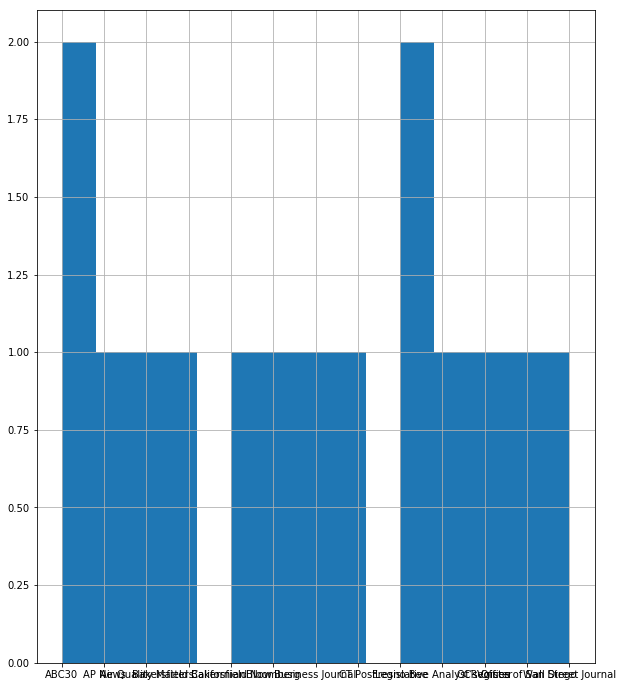

In [67]:
df['Media'][:15].hist(figsize=(10,12),bins=15)

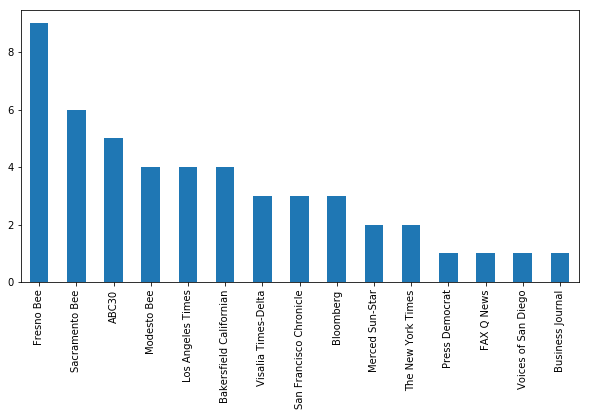

In [72]:
df['Media'].value_counts()[:15].plot(kind='bar',figsize=(10,5))


In [73]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['This', 'week', ',', 'the', 'High-Speed-Rail', 'Authority', 'marks', 'another', 'significant', 'milestone', '–']


In [74]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 11 samples and 11 outcomes>


In [75]:
fdist.most_common(2)

[('This', 1), ('week', 1)]

In [77]:
top_50 = df.Media.value_counts().nlargest(10)

In [78]:
top_50

Fresno Bee                 9
Sacramento Bee             6
ABC30                      5
Modesto Bee                4
Los Angeles Times          4
Bakersfield Californian    4
Visalia Times-Delta        3
San Francisco Chronicle    3
Bloomberg                  3
Merced Sun-Star            2
Name: Media, dtype: int64

In [79]:
df.Media.nunique()

51

In [80]:
media_freq = df.Media.value_counts()

In [81]:
media_freq

Fresno Bee                                                                           9
Sacramento Bee                                                                       6
ABC30                                                                                5
Modesto Bee                                                                          4
Los Angeles Times                                                                    4
Bakersfield Californian                                                              4
Visalia Times-Delta                                                                  3
San Francisco Chronicle                                                              3
Bloomberg                                                                            3
Merced Sun-Star                                                                      2
The New York Times                                                                   2
Press Democrat                             

In [82]:
Unique_Media = df.Media.nunique()

In [83]:
Unique_Media

51

In [84]:
Unique_media_names= df['Media'].unique()
print (Unique_media_names)

['Fresno Bee' 'Bakersfield Now' 'Air Quality Matters'
 'Bakersfield Californian' 'Bloomberg' 'ABC30' 'OCRegister' 'CT Post'
 'Business Journal' 'Voices of San Diego' 'Legislative Analyst’s Office'
 'AP News' 'Wall Street Journal' 'CNN' 'Sacramento Bee'
 'Visalia Times-Delta' 'The New York Times' 'Marketplace' 'CNBC'
 'Modesto Bee' 'AEI' 'LA Downtown News' 'Fox & Hounds' 'Press Democrat'
 'San Francisco Chronicle' 'City of Fresno'
 '5 stories, no repeated stories' 'Central Valley Business Times'
 'Los Angeles Times' 'Consumer Reports' 'Brookings' 'Observer'
 'Merced Sun-Star' 'FAX Q News' 'Mercury News'
 'Looking at the gas tax measure in depth'
 'The airline biz is booming. Here’s how big it is at Fresno Yosemite International'
 'FAX Fresno Area Express' 'Dayton Daily News'
 'There’s a new bus service in town, and it’s not from around these parts.'
 'Las Vegas Review-Journal ' 'Forbes'
 'Media: Tripnet.org, CAPRadio, Los Angeles Times, Valley Air'
 'Meeting the region’s need for safe, 

In [101]:
media_names=str(df['Media'].values)
media_names

"['Fresno Bee' 'Bakersfield Now' 'Air Quality Matters'\n 'Bakersfield Californian' 'Bloomberg' 'ABC30' 'OCRegister' 'CT Post'\n 'Business Journal' 'Voices of San Diego' 'ABC30' 'Fresno Bee'\n 'Legislative Analyst’s Office' 'AP News' 'Wall Street Journal' 'CNN'\n 'Sacramento Bee' 'ABC30' 'Visalia Times-Delta' 'The New York Times'\n 'Marketplace' 'CNBC' 'Modesto Bee' 'AEI' 'LA Downtown News'\n 'Fox & Hounds' 'Press Democrat' 'Visalia Times-Delta' 'Sacramento Bee'\n 'Fresno Bee' 'San Francisco Chronicle' 'Sacramento Bee' 'City of Fresno'\n 'Fresno Bee' '5 stories, no repeated stories'\n 'Central Valley Business Times' 'Bloomberg' 'Los Angeles Times'\n 'Consumer Reports' 'Brookings' 'Observer' 'Merced Sun-Star' 'Fresno Bee'\n 'Visalia Times-Delta' 'FAX Q News' 'Bakersfield Californian'\n 'Sacramento Bee' 'Mercury News' 'Looking at the gas tax measure in depth'\n 'Los Angeles Times' 'Modesto Bee' 'ABC30' 'Modesto Bee'\n 'Bakersfield Californian' 'Bloomberg' 'Fresno Bee' 'Los Angeles Times'\

In [105]:
#stopwords.words('english').append('water')
stop_words = set(stopwords.words('english')) 
stop_words.add('water')  
w_tokens = word_tokenize(media_names) 
  
new_media_name = [w for w in w_tokens if not w in stop_words] 
  
new_media_name = ""
  
for w in w_tokens: 
    if w not in stop_words: 
        new_media_name = new_media_name +(w) + " " 

In [106]:
new_media_name

"[ 'Fresno Bee ' 'Bakersfield Now ' 'Air Quality Matters' 'Bakersfield Californian ' 'Bloomberg ' 'ABC30 ' 'OCRegister ' 'CT Post' 'Business Journal ' 'Voices San Diego ' 'ABC30 ' 'Fresno Bee' 'Legislative Analyst ’ Office ' 'AP News ' 'Wall Street Journal ' 'CNN' 'Sacramento Bee ' 'ABC30 ' 'Visalia Times-Delta ' 'The New York Times' 'Marketplace ' 'CNBC ' 'Modesto Bee ' 'AEI ' 'LA Downtown News' 'Fox & Hounds ' 'Press Democrat ' 'Visalia Times-Delta ' 'Sacramento Bee' 'Fresno Bee ' 'San Francisco Chronicle ' 'Sacramento Bee ' 'City Fresno' 'Fresno Bee ' '5 stories , repeated stories' 'Central Valley Business Times ' 'Bloomberg ' 'Los Angeles Times' 'Consumer Reports ' 'Brookings ' 'Observer ' 'Merced Sun-Star ' 'Fresno Bee' 'Visalia Times-Delta ' 'FAX Q News ' 'Bakersfield Californian' 'Sacramento Bee ' 'Mercury News ' 'Looking gas tax measure depth' 'Los Angeles Times ' 'Modesto Bee ' 'ABC30 ' 'Modesto Bee' 'Bakersfield Californian ' 'Bloomberg ' 'Fresno Bee ' 'Los Angeles Times' 'Sa

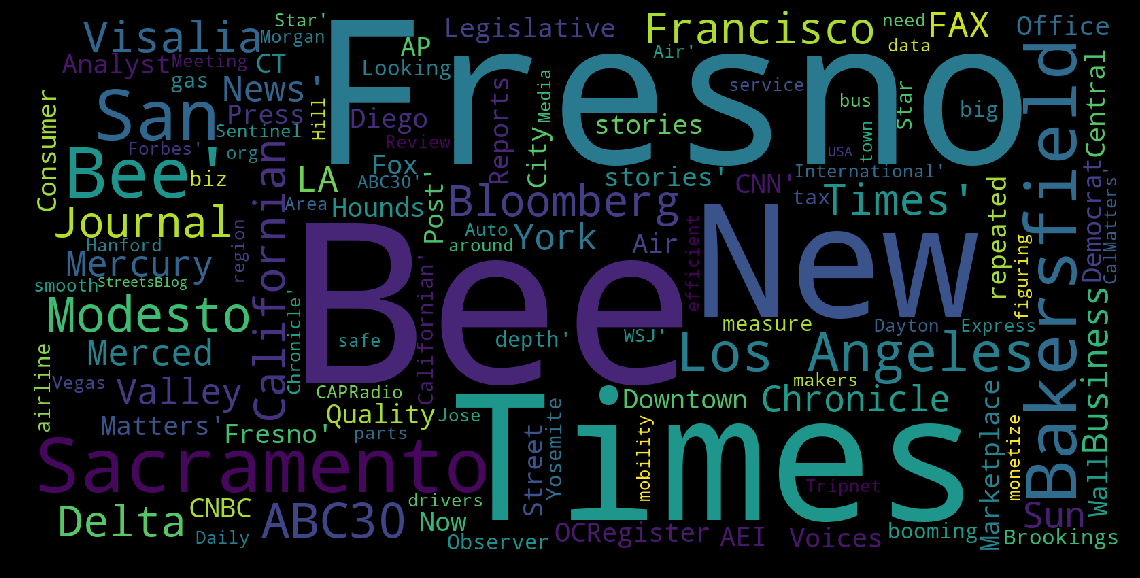

In [107]:
wordcloud = WordCloud(width=1600, height=800).generate(new_media_name)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('media_list.png', facecolor='k', bbox_inches='tight')

In [85]:
print (df['Media'].values)


['Fresno Bee' 'Bakersfield Now' 'Air Quality Matters'
 'Bakersfield Californian' 'Bloomberg' 'ABC30' 'OCRegister' 'CT Post'
 'Business Journal' 'Voices of San Diego' 'ABC30' 'Fresno Bee'
 'Legislative Analyst’s Office' 'AP News' 'Wall Street Journal' 'CNN'
 'Sacramento Bee' 'ABC30' 'Visalia Times-Delta' 'The New York Times'
 'Marketplace' 'CNBC' 'Modesto Bee' 'AEI' 'LA Downtown News'
 'Fox & Hounds' 'Press Democrat' 'Visalia Times-Delta' 'Sacramento Bee'
 'Fresno Bee' 'San Francisco Chronicle' 'Sacramento Bee' 'City of Fresno'
 'Fresno Bee' '5 stories, no repeated stories'
 'Central Valley Business Times' 'Bloomberg' 'Los Angeles Times'
 'Consumer Reports' 'Brookings' 'Observer' 'Merced Sun-Star' 'Fresno Bee'
 'Visalia Times-Delta' 'FAX Q News' 'Bakersfield Californian'
 'Sacramento Bee' 'Mercury News' 'Looking at the gas tax measure in depth'
 'Los Angeles Times' 'Modesto Bee' 'ABC30' 'Modesto Bee'
 'Bakersfield Californian' 'Bloomberg' 'Fresno Bee' 'Los Angeles Times'
 'San Francisco

## Analyse the Description of News Articles

In [86]:
#get string without removing stopwords
desc = df['Description']
text = desc.to_string()
#text

## Generate Wordcloud from the pandas Description coloumn

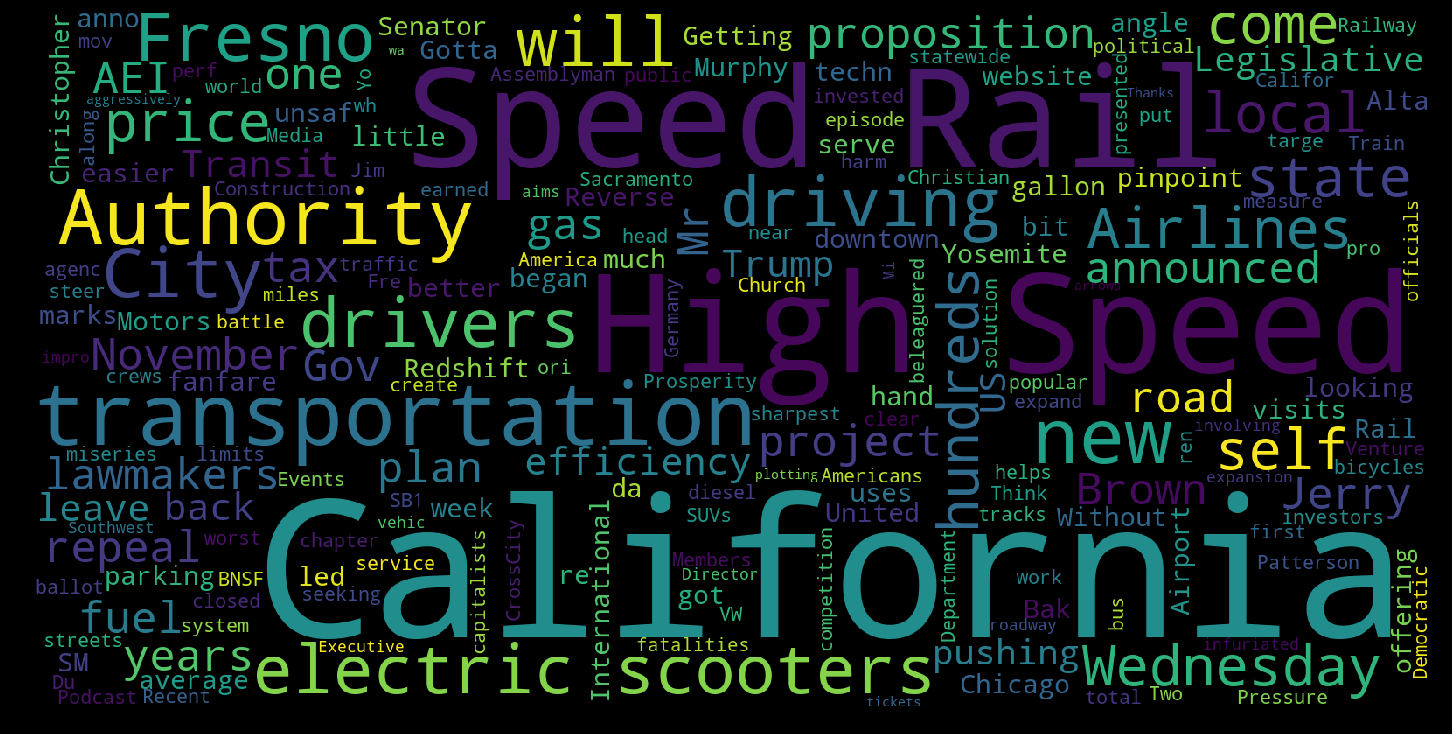

In [87]:

wordcloud = WordCloud(width=1600, height=800).generate(text)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Get Description Coloumn, remove stopwords and then plot wordcloud.

In [89]:
data = df['Description']
description = data.str.cat()



In [90]:
#stopwords.words('english').append('water')
stop_words = set(stopwords.words('english')) 
stop_words.add('water')  
word_tokens = word_tokenize(description) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = ""
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence = filtered_sentence +(w) + " " 

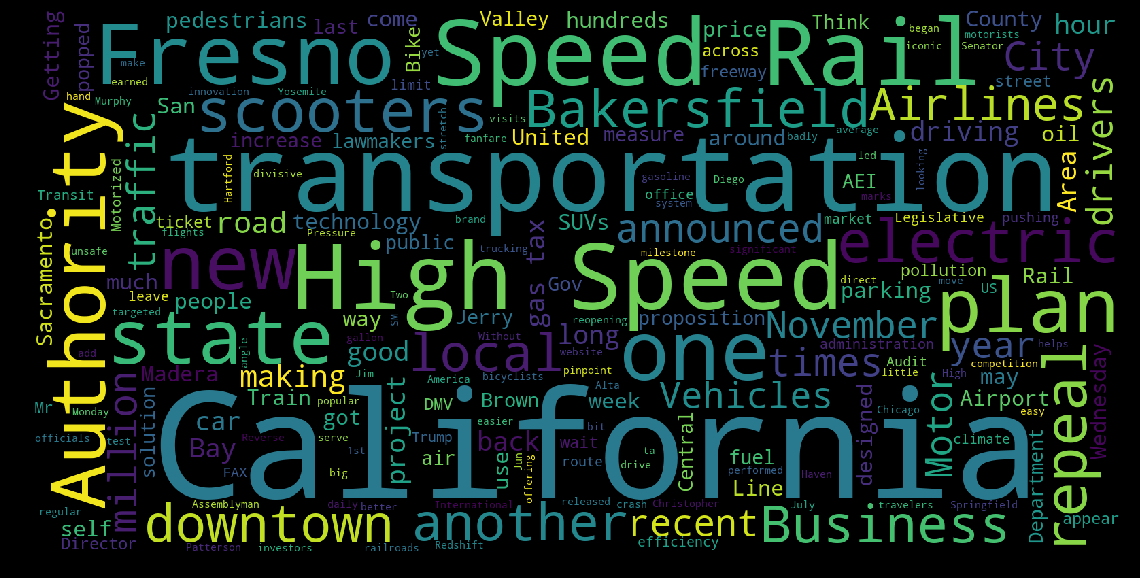

In [91]:
wordcloud = WordCloud(width=1600, height=800).generate(filtered_sentence)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [ ]:
wordcloud.words_